In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [3]:
import warnings
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
pd.set_option('max_columns', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

# Analyse Train and Test datasets

In [5]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,"1,961.00",Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,"1,329.00",GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,"1,958.00",Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,"1,997.00",Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,"1,998.00",Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,"1,017.00","1,280.00",GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,"1,992.00",RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Analyse Target Variable

In [8]:
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df.SalePrice

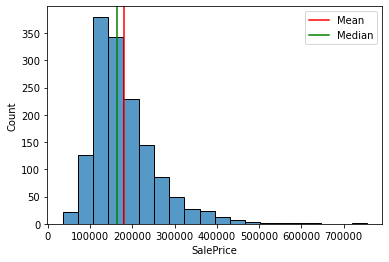

In [9]:
sns.histplot(y, bins=20)
plt.axvline(y.mean(), color='r', linestyle='-');
plt.axvline(y.median(), color='g', linestyle='-');
plt.legend({'Mean': y.mean(), 'Median':y.median()});

In [10]:
y_log = np.log(y)

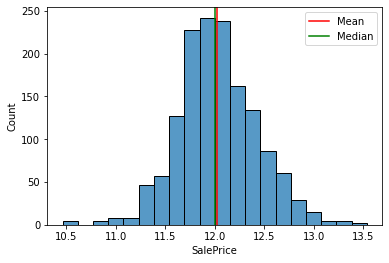

In [11]:
sns.histplot(y_log, bins=20)
mean = y_log.mean()
median = y_log.median()

plt.axvline(mean, color='r', linestyle='-');
plt.axvline(median, color='g', linestyle='-');
plt.legend({'Mean': mean, 'Median': median});

Now we can say that our target variable is normaly distributed

### Analyse Missing Values

In [12]:
def get_missing_values_info(data):
    missing_data = data.isna().sum()
    missing_data = missing_data[missing_data > 0]
    return missing_data

In [13]:
train_data_missing_values = get_missing_values_info(df)
test_data_missing_values = get_missing_values_info(test_df)

In [14]:
print('MISSING VALUES')
print('TRAIN: ', train_data_missing_values.shape[0])
print('TEST: ', test_data_missing_values.shape[0])

MISSING VALUES
TRAIN:  19
TEST:  33


In [15]:
train_data_missing_values

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [16]:
test_data_missing_values

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [17]:
attributes_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [18]:
X = X.drop(attributes_to_drop, axis=1)
test_df = test_df.drop(attributes_to_drop, axis=1)

In [19]:
categorical_data = X.select_dtypes(['object'])
numerical_data = X.select_dtypes(['int64', 'float64'])

In [20]:
get_missing_values_info(numerical_data)

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [21]:
categorical_features_with_missing_values = get_missing_values_info(categorical_data)
categorical_features_with_missing_values

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [22]:
numerical_features = list(numerical_data)
categorical_features = list(categorical_data)

# Numerical Data preprocessing

In [23]:
numerical_data.shape

(1460, 36)

### Filling missing values

In [24]:
imputer = SimpleImputer(strategy='median')
filled_numerical_data = imputer.fit_transform(numerical_data)
filled_numerical_data = pd.DataFrame(filled_numerical_data, columns=numerical_features)

### Backward elimination. Feature selection strategy

In [25]:
def backward_elimination(X, y, significance_level):
    X_selected = X.copy()
    columns = list(X)
    attributes_number = len(columns)
    
    for i in range(0, attributes_number):
        regressor_OLS = sm.OLS(y, X_selected).fit()
        
        maxValue = max(regressor_OLS.pvalues)
        if maxValue > significance_level:
            
            for j in range(0, attributes_number - i):
                
                if (regressor_OLS.pvalues[j] == maxValue):
                    X_selected = X_selected.drop(X_selected.columns[j], axis=1)
                    columns = np.delete(columns, j)
    
    regressor_OLS.summary()
    return X_selected, columns

In [26]:
selected_numerical_data, selected_columns = backward_elimination(filled_numerical_data, y_log, significance_level=0.05)

In [27]:
selected_columns.shape

(20,)

### Setting up a numerical pipeline 

In [28]:
numerical_pipeline = Pipeline([
    ('missing_values', SimpleImputer(strategy='median')),
    ('standardization', StandardScaler())
])

In [29]:
numerical_pipeline.fit_transform(numerical_data)[0].shape

(36,)

In [30]:
selected_columns[:10]

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath'], dtype='<U13')

In [31]:
processed_numerical_data = pd.DataFrame(numerical_pipeline.fit_transform(numerical_data), columns=numerical_features)

In [32]:
processed_numerical_data = processed_numerical_data[selected_columns]

# Categorical Data preprocessing

In [33]:
categorical_features_with_missing_values

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

The plan is to make a classifier to predict missing values of FireplaceQu. In others just impute the most frequent value.

### Predicting FireplaceQu

In [34]:
y_fireplaceQu = categorical_data.FireplaceQu
indeces_for_train_data = ~y_fireplaceQu.isna()

In [37]:
y_fireplaceQu = y_fireplaceQu[indeces_for_train_data]
X_fireplaceQu = pd.DataFrame(imputer.transform(numerical_data[indeces_for_train_data]), columns=list(numerical_data))

In [38]:
X_fireplaceQu.shape

(770, 36)

In [39]:
y_fireplaceQu.shape

(770,)

### Feature Selection Anova f_test

In [40]:
f_test = SelectKBest(score_func=f_classif, k='all')

In [41]:
f_test.fit_transform(X_fireplaceQu, y_fireplaceQu)

array([[20.000, 80.000, 9600.000, ..., 0.000, 5.000, 2007.000],
       [60.000, 68.000, 11250.000, ..., 0.000, 9.000, 2008.000],
       [70.000, 60.000, 9550.000, ..., 0.000, 2.000, 2006.000],
       ...,
       [60.000, 62.000, 7917.000, ..., 0.000, 8.000, 2007.000],
       [20.000, 85.000, 13175.000, ..., 0.000, 2.000, 2010.000],
       [70.000, 66.000, 9042.000, ..., 2500.000, 5.000, 2010.000]])

In [42]:
f_test.pvalues_

array([0.203, 0.135, 0.822, 0.000, 0.346, 0.001, 0.000, 0.003, 0.000,
       0.072, 0.000, 0.000, 0.000, 0.000, 0.595, 0.000, 0.022, 0.105,
       0.000, 0.004, 0.145, 0.269, 0.000, 0.243, 0.003, 0.000, 0.000,
       0.024, 0.536, 0.466, 0.636, 0.771, 0.067, 0.140, 0.528, 0.683])

In [43]:
pd.Series((f_test.pvalues_ < 0.05)).value_counts()

False    18
True     18
dtype: int64

In [44]:
selected_X_fireplaceQu = X_fireplaceQu.loc[:, f_test.pvalues_ < 0.05]

In [45]:
selected_X_fireplaceQu.shape

(770, 18)

In [46]:
selected_X_fireplaceQu.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,6.00,"1,976.00","1,976.00",0.00,978.00,284.00,"1,262.00","1,262.00",0.00,"1,262.00",0.00,2.00,0.00,6.00,"1,976.00",2.00,460.00,298.00
1,7.00,"2,001.00","2,002.00",162.00,486.00,434.00,920.00,920.00,866.00,"1,786.00",1.00,2.00,1.00,6.00,"2,001.00",2.00,608.00,0.00
2,7.00,"1,915.00","1,970.00",0.00,216.00,540.00,756.00,961.00,756.00,"1,717.00",1.00,1.00,0.00,7.00,"1,998.00",3.00,642.00,0.00
3,8.00,"2,000.00","2,000.00",350.00,655.00,490.00,"1,145.00","1,145.00","1,053.00","2,198.00",1.00,2.00,1.00,9.00,"2,000.00",3.00,836.00,192.00
4,8.00,"2,004.00","2,005.00",186.00,"1,369.00",317.00,"1,686.00","1,694.00",0.00,"1,694.00",1.00,2.00,0.00,7.00,"2,004.00",2.00,636.00,255.00


### PCA 

In [47]:
pca = PCA(n_components=0.99)

In [48]:
pca_fireplaceQu = pca.fit_transform(X_fireplaceQu)

### T-SNE analysis

In [49]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(processed_numerical_data)

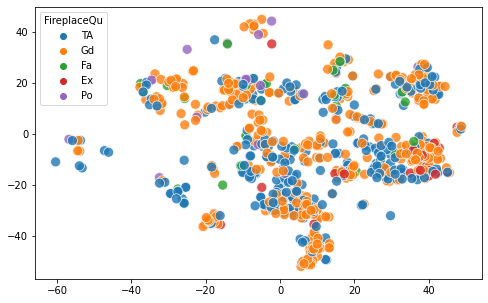

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tsne_repr[:, 0], y=tsne_repr[:, 1], alpha=0.8, s=100, hue=categorical_data.FireplaceQu);

The plot above shows that our FireplaceQu doesn't have any clusters. Most likely it will be hard to distiguish or classify this data

**1. I'm going to use a KNN classifier and GridSearchCV for tuning parameters.**

- weights {'uniform', 'distance'}
- n_neighbors { 3, 5, 8}
- algorithm {'auto', 'ball_tree', 'kd_tree', 'brute'}

In [52]:
params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': list(range(5, 30, 5)),
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

In [53]:
grid_search = GridSearchCV(KNeighborsClassifier(), params, scoring='accuracy', cv=10)

In [54]:
print(y_fireplaceQu.shape)
print(selected_X_fireplaceQu.shape)

(770,)
(770, 18)


In [55]:
selected_X_fireplaceQu.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
0,6.00,"1,976.00","1,976.00",0.00,978.00,284.00,"1,262.00","1,262.00",0.00,"1,262.00",0.00,2.00,0.00,6.00,"1,976.00",2.00,460.00,298.00
1,7.00,"2,001.00","2,002.00",162.00,486.00,434.00,920.00,920.00,866.00,"1,786.00",1.00,2.00,1.00,6.00,"2,001.00",2.00,608.00,0.00
2,7.00,"1,915.00","1,970.00",0.00,216.00,540.00,756.00,961.00,756.00,"1,717.00",1.00,1.00,0.00,7.00,"1,998.00",3.00,642.00,0.00
3,8.00,"2,000.00","2,000.00",350.00,655.00,490.00,"1,145.00","1,145.00","1,053.00","2,198.00",1.00,2.00,1.00,9.00,"2,000.00",3.00,836.00,192.00
4,8.00,"2,004.00","2,005.00",186.00,"1,369.00",317.00,"1,686.00","1,694.00",0.00,"1,694.00",1.00,2.00,0.00,7.00,"2,004.00",2.00,636.00,255.00


In [56]:
y_fireplaceQu.head()

1    TA
2    TA
3    Gd
4    TA
6    Gd
Name: FireplaceQu, dtype: object

In [57]:
y_fireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

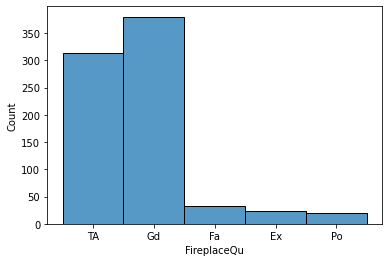

In [58]:
sns.histplot(y_fireplaceQu);

The feature looks pretty unbalanced, but as far as I'm concerned knn can't be influenced by unbalanced data

In [59]:
grid_search.fit(selected_X_fireplaceQu, y_fireplaceQu)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 20, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [60]:
grid_search.best_score_

0.6116883116883117

In [61]:
grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 15, 'weights': 'distance'}

**2. RandomForestClassifier**

Lets try randomforest with balanced classes

In [62]:
params = {'max_depth': range(5, 30, 5), 'class_weight': ['balanced']}

In [63]:
grid_search = GridSearchCV(RandomForestClassifier(), params, scoring='accuracy', cv=10)

In [64]:
grid_search.fit(selected_X_fireplaceQu, y_fireplaceQu)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': range(5, 30, 5)},
             scoring='accuracy')

In [65]:
grid_search.best_score_

0.7155844155844155

In [66]:
grid_search.best_params_

{'class_weight': 'balanced', 'max_depth': 10}

**The conclusion:** it will be better to fill missing categorical data using 'the most frequent' strategy, because as I see it is hard to distinguish classes in FireplaceQu we can see it on plotted diagram using t-sne. Other features have less than 100 of missing values so I think it won't affect to much the results.

## Impute Missing Values

In [67]:
imputer = SimpleImputer(strategy='most_frequent')

In [68]:
filled_categorical_data = pd.DataFrame(imputer.fit_transform(categorical_data), columns=categorical_data.columns)
filled_categorical_data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [69]:
class Imputer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy='most_frequent')
        filled_X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
        
        return filled_X

In [70]:
Imputer().fit_transform(categorical_data).head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


## Encoding categorical data

In [71]:
encoder = OneHotEncoder(drop='first')
encoder = encoder.fit(filled_categorical_data)

In [72]:
filled_encoded_categorical_data = pd.DataFrame(encoder.transform(filled_categorical_data).todense(), 
                                               columns=encoder.get_feature_names(categorical_data.columns))

In [73]:
filled_encoded_categorical_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1

In [74]:
filled_encoded_categorical_data.shape

(1460, 200)

In [126]:
class Encoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, train_data):
        self.train_data = train_data
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder(drop='first')
        encoder = encoder.fit(self.train_data)
        X = X.copy().loc[:, self.train_data.columns]
        
        encoded_X = pd.DataFrame(encoder.transform(X).todense(), 
                                               columns=encoder.get_feature_names(X.columns))
        
        return encoded_X

In [127]:
Encoder(categorical_data).fit_transform(categorical_data).head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0

## Feature Selection

In [77]:
f_test = SelectKBest(score_func=f_classif, k='all')

In [78]:
f_test.fit_transform(filled_encoded_categorical_data, y)

array([[0.000, 0.000, 1.000, ..., 0.000, 1.000, 0.000],
       [0.000, 0.000, 1.000, ..., 0.000, 1.000, 0.000],
       [0.000, 0.000, 1.000, ..., 0.000, 1.000, 0.000],
       ...,
       [0.000, 0.000, 1.000, ..., 0.000, 1.000, 0.000],
       [0.000, 0.000, 1.000, ..., 0.000, 1.000, 0.000],
       [0.000, 0.000, 1.000, ..., 0.000, 1.000, 0.000]])

In [79]:
pd.Series((f_test.pvalues_ < 0.05)).value_counts()

False    119
True      81
dtype: int64

In [80]:
selected_categorical_encoded_features = list(filled_encoded_categorical_data.loc[:, f_test.pvalues_ < 0.05])

In [81]:
len(selected_categorical_encoded_features)

81

In [82]:
selected_categorical_encoded_features[:10]

['MSZoning_FV',
 'Street_Pave',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LandSlope_Mod',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_IDOTRR']

In [115]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.loc[:, self.columns]
        

In [116]:
FeatureSelector(selected_categorical_encoded_features).fit_transform(filled_encoded_categorical_data).shape

(1460, 81)

## Setting up pipeline for categorical data

In [128]:
categorical_pipeline = Pipeline([
    ('missing_values', Imputer()),
    ('encoding', Encoder(categorical_data)),
    ('feature_selection', FeatureSelector(selected_categorical_encoded_features))
])

In [130]:
categorical_pipeline.fit_transform(categorical_data).head()

,MSZoning_FV,Street_Pave,LotShape_IR3,LotShape_Reg,LandContour_HLS,LotConfig_CulDSac,LandSlope_Mod,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_IDOTRR,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_PosN,Condition1_RRAn,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofMatl_Membran,RoofMatl_WdShngl,Exterior1st_CemntBd,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Stucco,Exterior2nd_VinylSd,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_GLQ,BsmtFinType1_Unf,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,GarageType_Attchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,SaleType_Con,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
0,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
1,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
3,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00


In [132]:
full_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, selected_columns),
    ('categorical', categorical_pipeline, categorical_features)
])

In [133]:
selected_columns

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolArea', 'YrSold'], dtype='<U13')

In [134]:
output = full_pipeline.fit_transform(X)

In [135]:
output

array([[0.073, -0.207, 0.651, ..., 0.000, 1.000, 0.000],
       [-0.873, -0.092, -0.072, ..., 0.000, 1.000, 0.000],
       [0.073, 0.073, 0.651, ..., 0.000, 1.000, 0.000],
       ...,
       [0.310, -0.148, 0.651, ..., 0.000, 1.000, 0.000],
       [-0.873, -0.080, -0.795, ..., 0.000, 1.000, 0.000],
       [-0.873, -0.058, -0.795, ..., 0.000, 1.000, 0.000]])

In [136]:
test_df = pd.read_csv('test.csv')

In [138]:
full_pipeline.fit_transform(test_df).shape

(1459, 101)